In [1]:
%matplotlib notebook

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'sans'
mpl.rcParams['mathtext.it'] = 'sans:italic'

import pygeodesy.geoids as geoids

# [Undulation of the geoid](https://en.wikipedia.org/wiki/Geoid#Undulation)

[EGM-2008](https://en.wikipedia.org/wiki/Earth_Gravitational_Model) can be downloaded as 

```
wget https://sourceforge.net/projects/geographiclib/files/geoids-distrib/egm2008-5.tar.bz2 -O- | tar xvfj -
```

More data at https://geographiclib.sourceforge.io/html/geoid.html

basemap installation
```
python3 -m pip install --upgrade --force-reinstall --user https://github.com/matplotlib/basemap/archive/master.zip
```

In [2]:
geoid = geoids.GeoidPGM("geoids/egm2008-5.pgm")

<IPython.core.display.Javascript object>


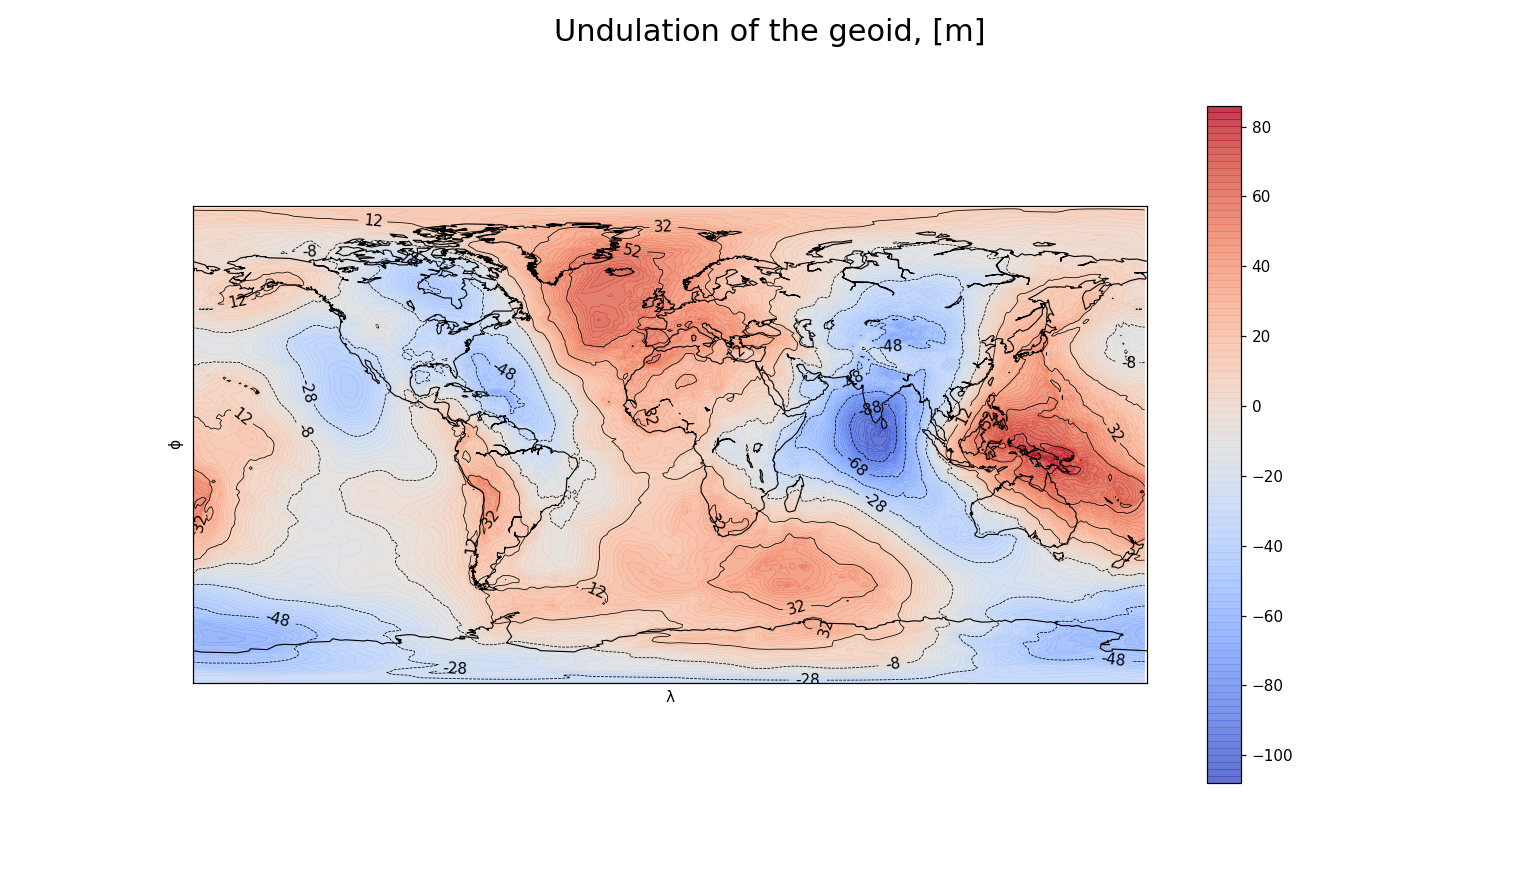

In [3]:
λ, φ = np.meshgrid(np.arange(-180, 180, 1), np.arange(-90, 90, 1))

fig, ax = plt.subplots(1, 1, figsize=(14,8))
fig.suptitle(r'Undulation of the geoid, [m]', fontsize=20)

N = np.vectorize(geoid.height)(φ, λ)

cs = ax.contourf(λ, φ, N, 100, cmap=plt.cm.coolwarm, alpha=0.8)
cs2 = ax.contour(cs, levels=cs.levels[::10],colors=['black'], linewidths=[0.5,])

fig.colorbar(cs, ax=ax)
ax.clabel(cs2, cs2.levels, fmt='%.0f')
ax.set_aspect(1)
ax.set_xlabel(r'$\mathrm{\lambda}$')
ax.set_ylabel(r'$\mathrm{\phi}$')

m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines(linewidth=0.75);

<IPython.core.display.Javascript object>


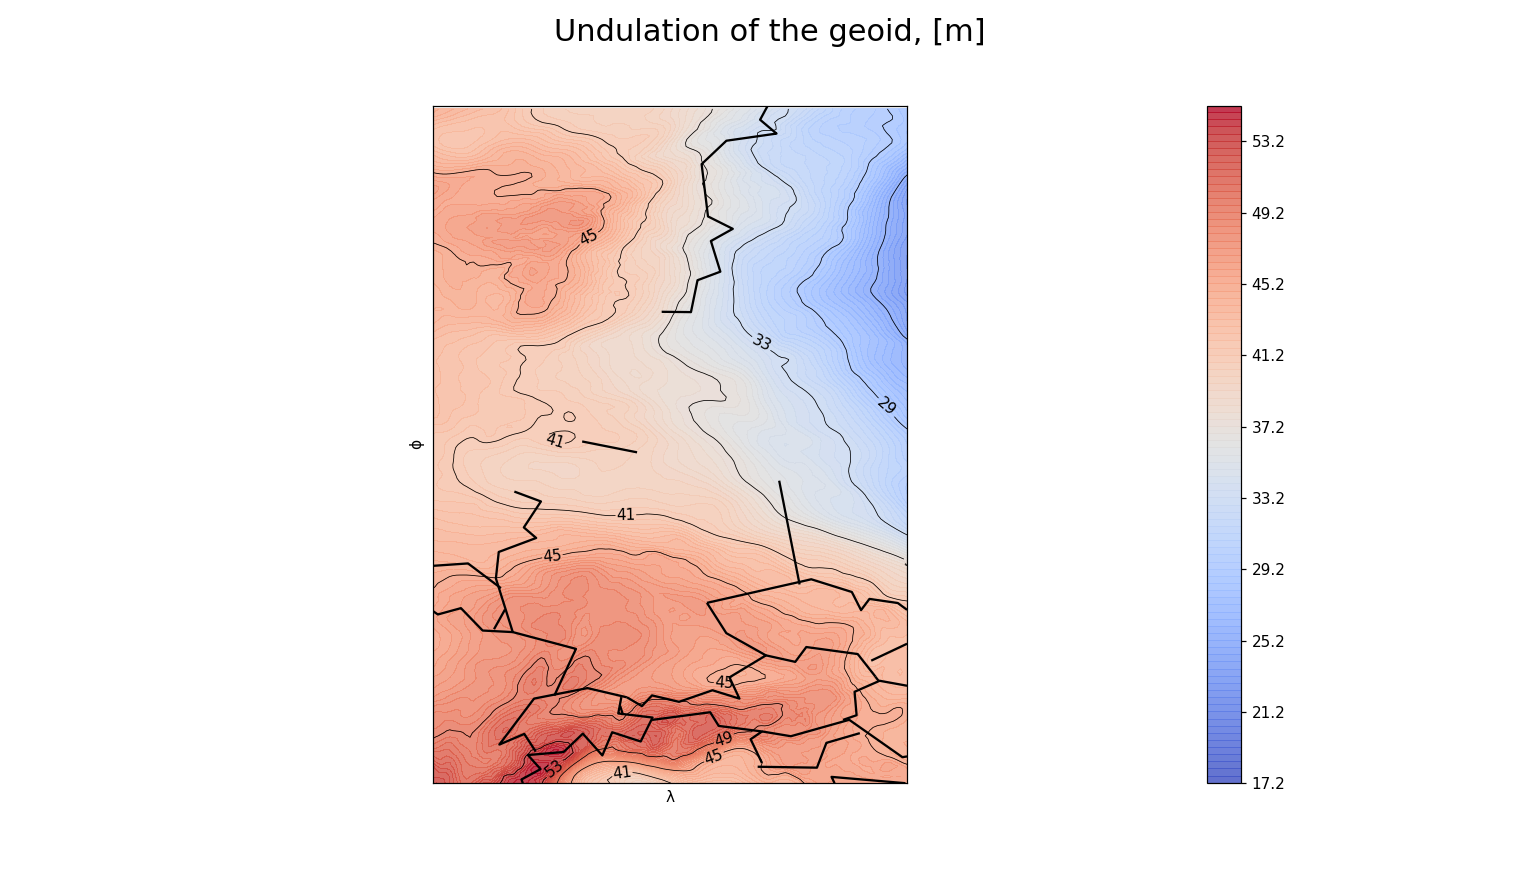

In [4]:
λ, φ = np.meshgrid(np.arange(4, 24, 0.1), np.arange(45, 65, 0.1))

fig, ax = plt.subplots(1, 1, figsize=(14,8))
fig.suptitle(r'Undulation of the geoid, [m]', fontsize=20)

N = np.vectorize(geoid.height)(φ, λ)

cs = ax.contourf(λ, φ, N, 100, cmap=plt.cm.coolwarm, alpha=0.8)
cs2 = ax.contour(cs, levels=cs.levels[::10],colors=['black'], linewidths=[0.5,])

fig.colorbar(cs, ax=ax)
ax.clabel(cs2, cs2.levels, fmt='%.0f')
ax.set_xlabel(r'$\mathrm{\lambda}$')
ax.set_ylabel(r'$\mathrm{\phi}$')

m = Basemap(projection='cyl',llcrnrlat=45,urcrnrlat=65,llcrnrlon=4,urcrnrlon=18,resolution='c')
m.drawcountries(linewidth=1.5);